In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib_venn import venn2

In [19]:
books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
members = pd.read_csv('../data/SCoData_members_v1.2_2022_01.csv', encoding='utf-8')
events = pd.read_csv('../data/SCoData_events_v1.2_2022_01.csv', encoding='utf-8')

C:\Users\dittm\AppData\Local\Temp\ipykernel_5640\1388952493.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv('../data/SCoData_events_v1.2_2022_01.csv', encoding='utf-8')


## Member has card

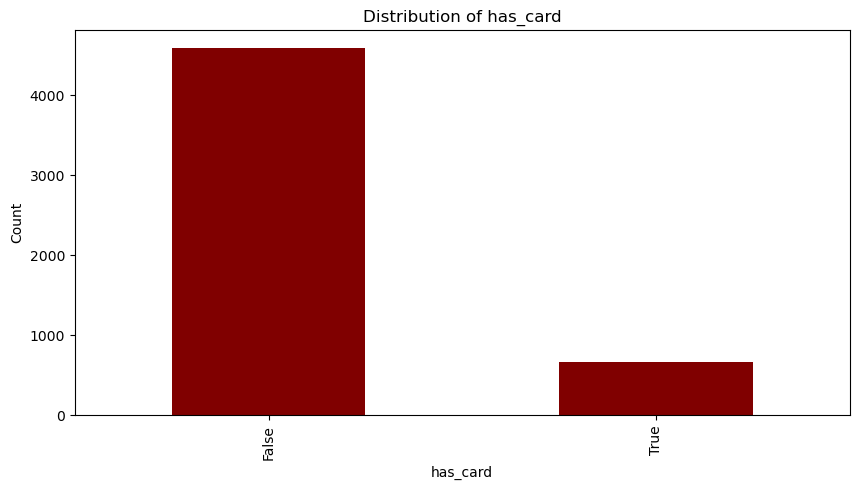

Mode of has_card distribution: False


In [20]:
mode_has_card = members['has_card'].value_counts().idxmax() # mode

count_has_card= members['has_card'].value_counts().sort_index()  # operate on series ; count

fig, ax = plt.subplots(figsize=(10, 5))

count_has_card.plot(kind='bar', color='maroon', ax=ax)

ax.set_xlabel('has_card')
ax.set_ylabel('Count')
ax.set_title('Distribution of has_card')

plt.show()

print(f"Mode of has_card distribution: {mode_has_card}")

In [21]:
members['has_card'].value_counts()

False    4581
True      654
Name: has_card, dtype: int64

In [22]:
percentages = members['has_card'].value_counts(normalize=True) * 100
print(percentages)

False    87.507163
True     12.492837
Name: has_card, dtype: float64


## Subscription by sources

In [23]:
event_type_subscription = events[events['event_type'] == 'Subscription'][['event_type', 'source_type']]

In [24]:
subscription_address = event_type_subscription.loc[event_type_subscription['source_type'] == 'Address Book']

In [25]:
subscription_card = event_type_subscription.loc[event_type_subscription['source_type'] == 'Lending Library Card']

In [26]:
subscription_logbook = event_type_subscription.loc[event_type_subscription['source_type'] == 'Logbook']

In [27]:
subscription_multiple = event_type_subscription.loc[event_type_subscription['source_type'].str.contains(';')]

In [28]:
subscription_multiple.value_counts()

event_type    source_type                              
Subscription  Logbook;Address Book                         1368
              Logbook;Lending Library Card                  329
              Lending Library Card;Address Book              35
              Logbook;Lending Library Card;Address Book      27
              Lending Library Card;Logbook                   26
              Lending Library Card;Lending Library Card       2
              Lending Library Card;Logbook;Address Book       1
dtype: int64

In [29]:
count_subscription_address = event_type_subscription.loc[event_type_subscription['source_type'] == 'Address Book'].shape[0]
count_subscription_card = event_type_subscription.loc[event_type_subscription['source_type'] == 'Lending Library Card'].shape[0]
count_subscription_logbook = event_type_subscription.loc[event_type_subscription['source_type'] == 'Logbook'].shape[0]
count_subscription_multiple = event_type_subscription.loc[event_type_subscription['source_type'].str.contains(';')].shape[0]

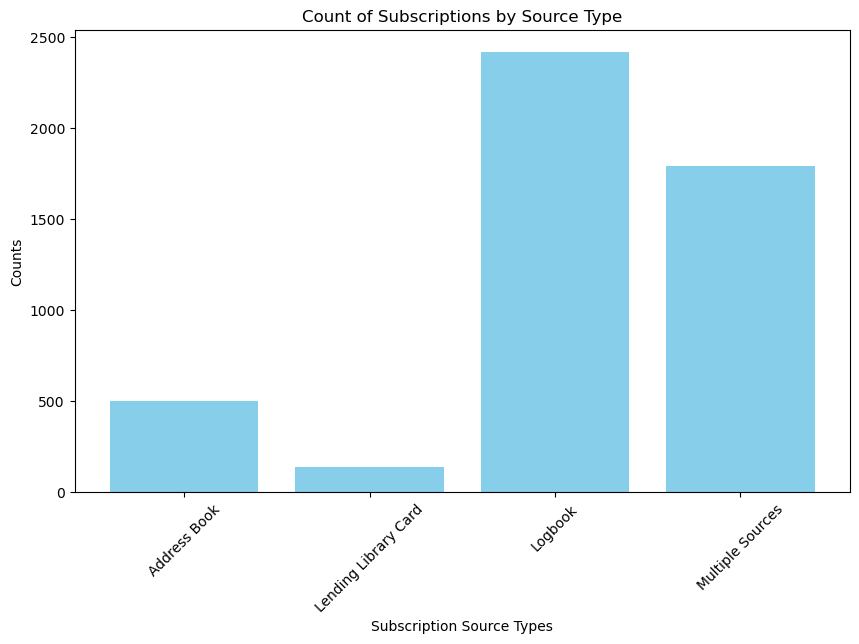

In [30]:
# Data for plotting
subscription_types = ['Address Book', 'Lending Library Card', 'Logbook', 'Multiple Sources']
counts = [count_subscription_address, count_subscription_card, count_subscription_logbook, count_subscription_multiple]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(subscription_types, counts, color='skyblue')
plt.xlabel('Subscription Source Types')
plt.ylabel('Counts')
plt.title('Count of Subscriptions by Source Type')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis to avoid overlapping
plt.show()

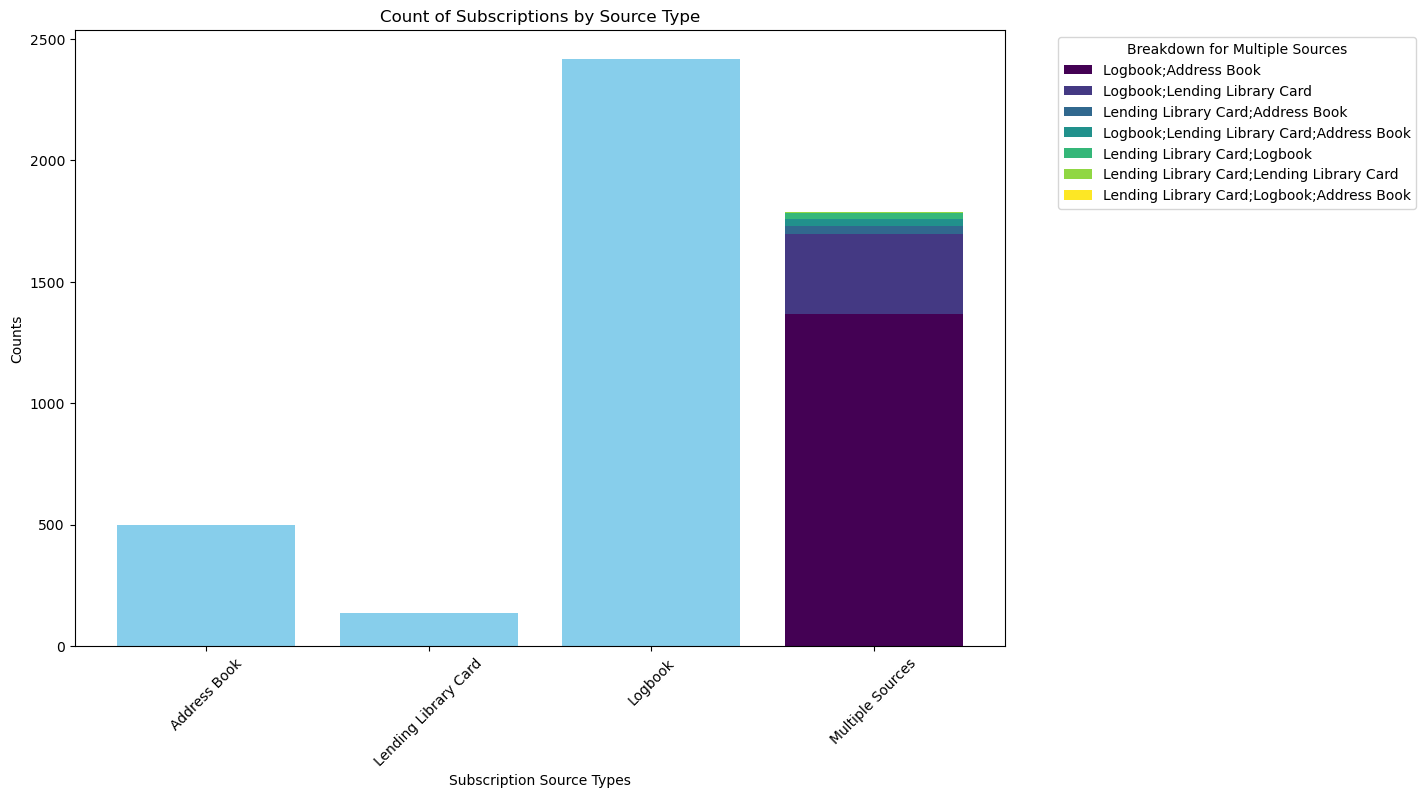

In [31]:

# Create a Series from the dictionary
multiple_counts = pd.Series(subscription_multiple.value_counts())

# Existing counts from your dataset
count_subscription_address = event_type_subscription.loc[event_type_subscription['source_type'] == 'Address Book'].shape[0]
count_subscription_card = event_type_subscription.loc[event_type_subscription['source_type'] == 'Lending Library Card'].shape[0]
count_subscription_logbook = event_type_subscription.loc[event_type_subscription['source_type'] == 'Logbook'].shape[0]

# Creating a bar chart
subscription_types = ['Address Book', 'Lending Library Card', 'Logbook', 'Multiple Sources']
counts = [count_subscription_address, count_subscription_card, count_subscription_logbook, 0]  # Set 0 temporarily for multiple

# Set up the plot
plt.figure(figsize=(12, 8))
bars = plt.bar(subscription_types[:-1], counts[:-1], color='skyblue')  # Plotting all except 'Multiple Sources'

# Adding the stacked bar for 'Multiple Sources'
bottom = 0
colors = plt.cm.viridis(np.linspace(0, 1, len(multiple_counts)))  # Generate distinct colors
for (info, count), color in zip(multiple_counts.items(), colors):
    plt.bar('Multiple Sources', count, bottom=bottom, color=color, label=info[1])
    bottom += count

plt.xlabel('Subscription Source Types')
plt.ylabel('Counts')
plt.title('Count of Subscriptions by Source Type')
plt.xticks(rotation=45)
plt.legend(title="Breakdown for Multiple Sources", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.show()

In [32]:
count_subscription_address = event_type_subscription.loc[event_type_subscription['source_type'] == 'Address Book'].shape[0]
count_subscription_card = event_type_subscription.loc[event_type_subscription['source_type'] == 'Lending Library Card'].shape[0]
count_subscription_logbook = event_type_subscription.loc[event_type_subscription['source_type'] == 'Logbook'].shape[0]
multiple_total = multiple_counts.sum()

# Total count for all categories
total_count = count_subscription_address + count_subscription_card + count_subscription_logbook + multiple_total

# Calculating percentages
percent_address = (count_subscription_address / total_count) * 100
percent_card = (count_subscription_card / total_count) * 100
percent_logbook = (count_subscription_logbook / total_count) * 100
percent_multiple = (multiple_total / total_count) * 100

# Outputting the percentages
print(f"Percentage of subscriptions from 'Address Book': {percent_address:.2f}%")
print(f"Percentage of subscriptions from 'Lending Library Card': {percent_card:.2f}%")
print(f"Percentage of subscriptions from 'Logbook': {percent_logbook:.2f}%")
print(f"Percentage of subscriptions from 'Multiple Sources': {percent_multiple:.2f}%")

# Breaking down percentages for 'Multiple Sources'
print("Breakdown of percentages for 'Multiple Sources':")
#for combo, count in subscription_multiple.items():
#    percent_combo = (count / total_count) * 100
#    print(f"  {combo}: {percent_combo:.2f}%")

Percentage of subscriptions from 'Address Book': 10.27%
Percentage of subscriptions from 'Lending Library Card': 2.83%
Percentage of subscriptions from 'Logbook': 49.95%
Percentage of subscriptions from 'Multiple Sources': 36.95%
Breakdown of percentages for 'Multiple Sources':


In [33]:
# Count the occurrences of each source_type combination
combo_counts = subscription_multiple['source_type'].value_counts()

# Calculate the total count of all combinations
total_count = combo_counts.sum()

# Calculate the percentage of each combination
combo_percentages = (combo_counts / total_count) * 100

# Display the percentages
print("Breakdown of percentages for 'Multiple Sources':")
for combo, percent in combo_percentages.items():
    print(f"  {combo}: {percent:.2f}%")

Breakdown of percentages for 'Multiple Sources':
  Logbook;Address Book: 76.51%
  Logbook;Lending Library Card: 18.40%
  Lending Library Card;Address Book: 1.96%
  Logbook;Lending Library Card;Address Book: 1.51%
  Lending Library Card;Logbook: 1.45%
  Lending Library Card;Lending Library Card: 0.11%
  Lending Library Card;Logbook;Address Book: 0.06%


In [34]:
# Count the occurrences of individual sources
count_subscription_address = df[df['source_type'] == 'Address Book'].shape[0]
count_subscription_card = df[df['source_type'] == 'Lending Library Card'].shape[0]
count_subscription_logbook = df[df['source_type'] == 'Logbook'].shape[0]

# Count the occurrences of combined sources
multiple_counts = events['source_type'].value_counts()
multiple_counts = multiple_counts[multiple_counts.index.str.contains(';')]  # Filter only combined entries
multiple_total = multiple_counts.sum()

# Total count for all categories
total_count = count_subscription_address + count_subscription_card + count_subscription_logbook + multiple_total

# Calculating percentages
percent_address = (count_subscription_address / total_count) * 100
percent_card = (count_subscription_card / total_count) * 100
percent_logbook = (count_subscription_logbook / total_count) * 100
percent_multiple = (multiple_total / total_count) * 100

# Outputting the percentages
print(f"Percentage of subscriptions from 'Address Book': {percent_address:.2f}%")
print(f"Percentage of subscriptions from 'Lending Library Card': {percent_card:.2f}%")
print(f"Percentage of subscriptions from 'Logbook': {percent_logbook:.2f}%")
print(f"Percentage of subscriptions from 'Multiple Sources': {percent_multiple:.2f}%")

# Breaking down percentages for 'Multiple Sources'
print("Breakdown of percentages for 'Multiple Sources':")
for combo, count in multiple_counts.items():
    percent_combo = (count / total_count) * 100
    print(f"  {combo}: {percent_combo:.2f}%")

NameError: name 'df' is not defined

## Renewal by sources

In [ ]:
event_type_renewal = events[events['event_type'] == 'Renewal'][['event_type', 'source_type']]

,event_type,source_type
31926,Renewal,Logbook
26865,Renewal,Logbook;Lending Library Card
19711,Renewal,Logbook;Lending Library Card;Address Book
9449,Renewal,Logbook;Lending Library Card
30814,Renewal,Logbook
2117,Renewal,Logbook;Lending Library Card
20781,Renewal,Lending Library Card
10984,Renewal,Logbook;Lending Library Card
27920,Renewal,Logbook;Lending Library Card
29274,Renewal,Logbook


In [ ]:
renewal_address = event_type_renewal.loc[event_type_renewal['source_type'] == 'Address Book']

,event_type,source_type
40,Renewal,Address Book
6863,Renewal,Address Book
18196,Renewal,Address Book
18909,Renewal,Address Book
20063,Renewal,Address Book


In [ ]:
renewal_card = event_type_renewal.loc[event_type_renewal['source_type'] == 'Lending Library Card']

,event_type,source_type
827,Renewal,Lending Library Card
881,Renewal,Lending Library Card
1527,Renewal,Lending Library Card
1550,Renewal,Lending Library Card
1712,Renewal,Lending Library Card
...,...,...
28345,Renewal,Lending Library Card
28522,Renewal,Lending Library Card
28703,Renewal,Lending Library Card
29103,Renewal,Lending Library Card


In [ ]:
renewal_logbook = event_type_renewal.loc[event_type_renewal['source_type'] == 'Logbook']

,event_type,source_type
748,Renewal,Logbook
785,Renewal,Logbook
787,Renewal,Logbook
811,Renewal,Logbook
815,Renewal,Logbook
...,...,...
35113,Renewal,Logbook
35115,Renewal,Logbook
35116,Renewal,Logbook
35118,Renewal,Logbook


In [ ]:
renewal_multiple = event_type_renewal.loc[event_type_renewal['source_type'].str.contains(';')]

,event_type,source_type
782,Renewal,Logbook;Lending Library Card
796,Renewal,Logbook;Lending Library Card
808,Renewal,Logbook;Lending Library Card
813,Renewal,Logbook;Lending Library Card
873,Renewal,Logbook;Lending Library Card
...,...,...
29275,Renewal,Logbook;Lending Library Card
29280,Renewal,Logbook;Lending Library Card
29313,Renewal,Logbook;Lending Library Card
29360,Renewal,Logbook;Lending Library Card


In [ ]:
renewal_multiple.value_counts()

event_type  source_type                                      
Renewal     Logbook;Lending Library Card                         697
            Logbook;Address Book                                  96
            Lending Library Card;Logbook                          33
            Logbook;Lending Library Card;Address Book             26
            Lending Library Card;Address Book                      8
            Logbook;Lending Library Card;Lending Library Card      5
            Lending Library Card;Lending Library Card              4
dtype: int64

In [ ]:
count_renewal_address = event_type_renewal.loc[event_type_renewal['source_type'] == 'Address Book'].shape[0]
count_renewal_card = event_type_renewal.loc[event_type_renewal['source_type'] == 'Lending Library Card'].shape[0]
count_renewal_logbook = event_type_renewal.loc[event_type_renewal['source_type'] == 'Logbook'].shape[0]
count_renewal_multiple = event_type_renewal.loc[event_type_renewal['source_type'].str.contains(';')].shape[0]

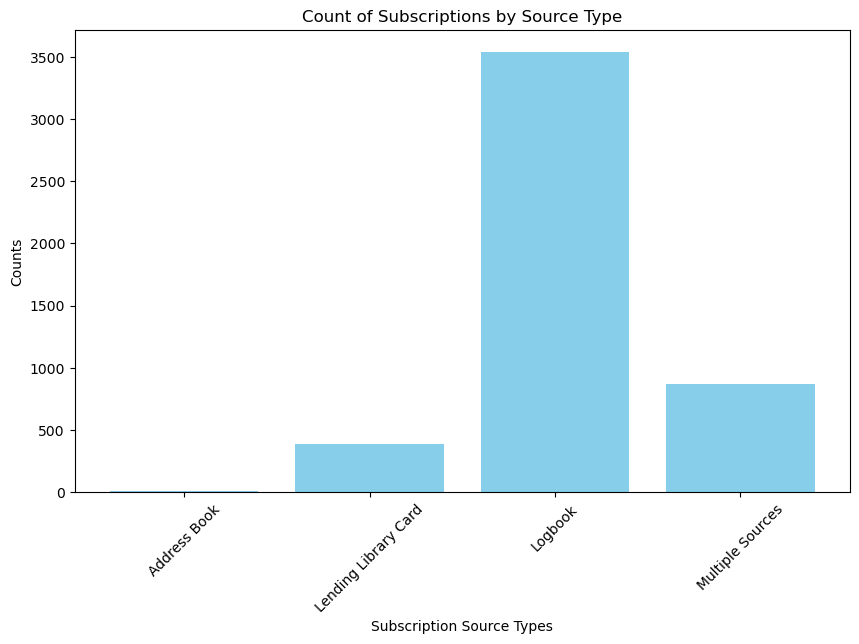

In [ ]:
# Data for plotting
renewal_types = ['Address Book', 'Lending Library Card', 'Logbook', 'Multiple Sources']
counts = [count_renewal_address, count_renewal_card, count_renewal_logbook, count_renewal_multiple]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(renewal_types, counts, color='skyblue')
plt.xlabel('Subscription Source Types')
plt.ylabel('Counts')
plt.title('Count of Subscriptions by Source Type')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis to avoid overlapping
plt.show()

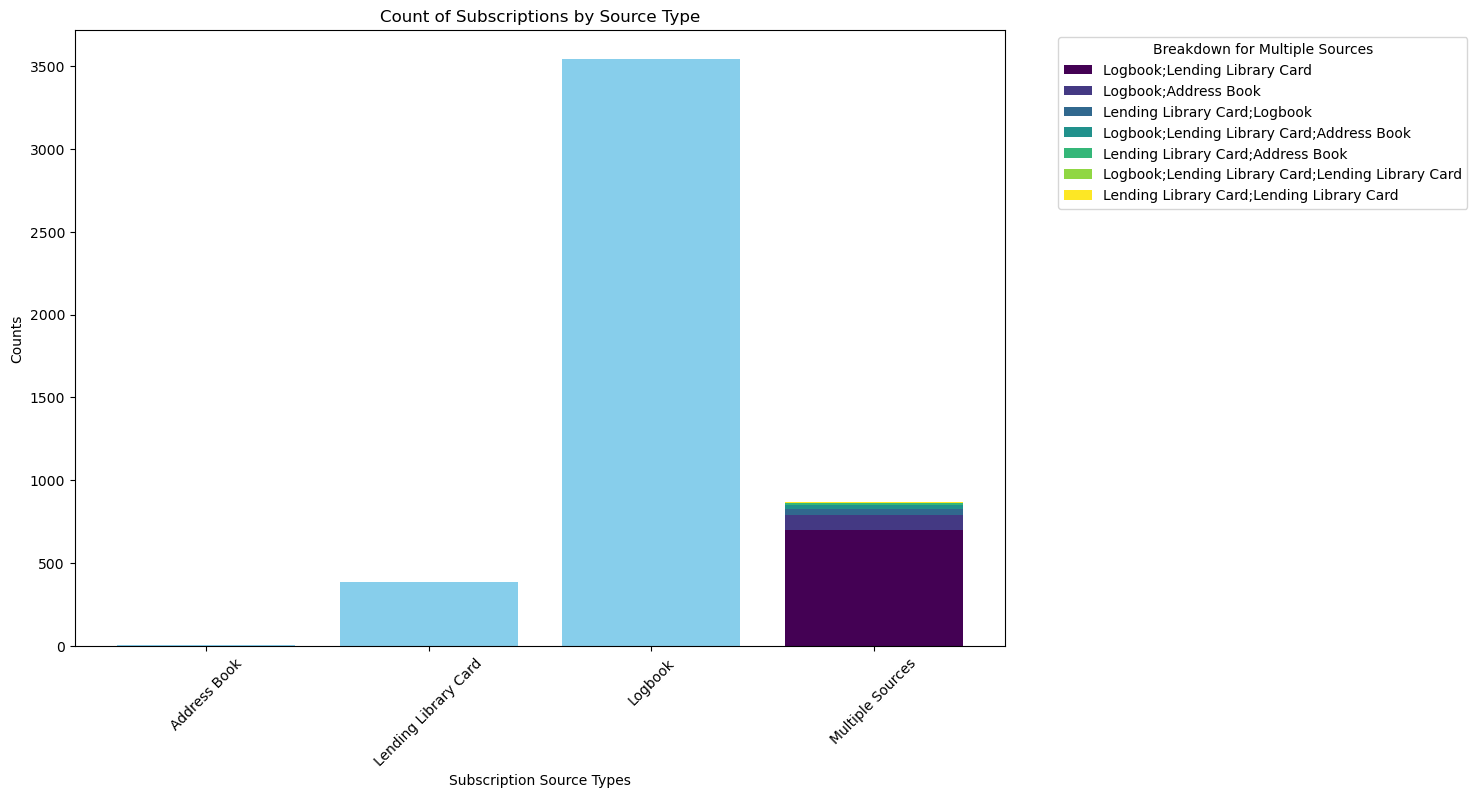

In [ ]:
# Create a Series from the dictionary
multiple_counts = pd.Series(renewal_multiple.value_counts())

# Existing counts from your dataset
count_renewal_address = event_type_renewal.loc[event_type_renewal['source_type'] == 'Address Book'].shape[0]
count_renewal_card = event_type_renewal.loc[event_type_renewal['source_type'] == 'Lending Library Card'].shape[0]
count_renewal_logbook = event_type_renewal.loc[event_type_renewal['source_type'] == 'Logbook'].shape[0]

# Creating a bar chart
renewal_types = ['Address Book', 'Lending Library Card', 'Logbook', 'Multiple Sources']
counts = [count_renewal_address, count_renewal_card, count_renewal_logbook, 0]  # Set 0 temporarily for multiple

# Set up the plot
plt.figure(figsize=(12, 8))
bars = plt.bar(renewal_types[:-1], counts[:-1], color='skyblue')  # Plotting all except 'Multiple Sources'

# Adding the stacked bar for 'Multiple Sources'
bottom = 0
colors = plt.cm.viridis(np.linspace(0, 1, len(multiple_counts)))  # Generate distinct colors
for (info, count), color in zip(multiple_counts.items(), colors):
    plt.bar('Multiple Sources', count, bottom=bottom, color=color, label=info[1])
    bottom += count

plt.xlabel('Subscription Source Types')
plt.ylabel('Counts')
plt.title('Count of Subscriptions by Source Type')
plt.xticks(rotation=45)
plt.legend(title="Breakdown for Multiple Sources", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.show()

In [ ]:
multiple_total = multiple_counts.sum()

# Total count for all categories
total_count = count_renewal_address + count_renewal_card + count_renewal_logbook + multiple_total

# Calculating percentages
percent_address = (count_renewal_address / total_count) * 100
percent_card = (count_renewal_card / total_count) * 100
percent_logbook = (count_renewal_logbook / total_count) * 100
percent_multiple = (multiple_total / total_count) * 100

# Outputting the percentages
print(f"Percentage of subscriptions from 'Address Book': {percent_address:.2f}%")
print(f"Percentage of subscriptions from 'Lending Library Card': {percent_card:.2f}%")
print(f"Percentage of subscriptions from 'Logbook': {percent_logbook:.2f}%")
print(f"Percentage of subscriptions from 'Multiple Sources': {percent_multiple:.2f}%")

# Breaking down percentages for 'Multiple Sources'
# print("Breakdown of percentages for 'Multiple Sources':")
# for combo, count in renewal_multiple.items():
  #  percent_combo = (count / total_count) * 100
   # print(f"  {combo}: {percent_combo:.2f}%")


Percentage of subscriptions from 'Address Book': 0.10%
Percentage of subscriptions from 'Lending Library Card': 8.00%
Percentage of subscriptions from 'Logbook': 73.79%
Percentage of subscriptions from 'Multiple Sources': 18.11%


## Borrowing by sources

In [ ]:
event_type_borrow = events[events['event_type'] == 'Borrow'][['event_type', 'source_type']]
event_type_borrow['source_type'].unique()

array(['Lending Library Card',
       'Lending Library Card;Lending Library Card',
       'Lending Library Card;Lending Library Card;Lending Library Card'],
      dtype=object)